# Model Evaluation 
This notebook is an **optional** resource that goes with the tutorial video. This may help you learn it faster by following along, and filling in the code. 

Load the NHANES dataset, and use Diabetes status as the response variable and a few others as predictors. 

Change the path the NHANES data below.

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split
import matplotlib.pyplot as plt

nhanes = pd.read_csv('nhanes.csv')
nhanes = nhanes.drop_duplicates('ID') # remove multiple entries from the same person
cols = ['Weight', 'Height', 'Gender', 'Age', 'BPSysAve', 'BPDiaAve',
        'TotChol', 'Diabetes', 'PhysActive', 'SmokeNow']
df = nhanes[cols].copy()
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
y = df.Diabetes_Yes.values
X = df.drop('Diabetes_Yes', axis=1).values
num_cols = [0,1,2,3,4,5]

Create training and test sets (80/20). 

In [14]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,stratify=y)

In [16]:
X_train.shape

(1490, 9)

In [17]:
X_test.shape

(373, 9)

In [18]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [19]:
y_test.mean()

0.13136729222520108

In [20]:
y_train.mean()

0.13288590604026845

Print the dimensions of each set. 

How many positive cases (i.e. having diabetes) are there in the training and test sets? 

In [21]:
X_train.mean()

55.73448844146159

In [22]:
X_test.mean()

55.42402144772118

Repeat the last few steps, but first stratify on the response variable so that each set has an approximately equal number of cases. 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,stratify=y)

Standardize the numeric columns of this dataset. 

In [24]:
scaler=StandardScaler()
X_train[:,num_cols]=scaler.fit_transform(X_train[:,num_cols])
X_test[:,num_cols]=scaler.fit_transform(X_test[:,num_cols])

Fit a logistic regression model to this data. What is the accuracy? 

In [25]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8785234899328859

What is the accuracy on the test set? 

In [26]:
lr.score(X_test,y_test)

0.8632707774798928

# Create splits of the data for 5-fold cross validation.

In [27]:
cv=KFold(5, shuffle=True)
cv.split(X_train)

<generator object _BaseKFold.split at 0x1a1f530f50>

Iterate over the 5 folds of the training data, at each stage using 4 folds for training and 1 for validation. 

Try values of .01, .1, 1.0 and 10.0 for values of the regularization parameter `C`. Save the accuracy from each fit of the model. You should have a total of 20 scores: 5 values from each fold and for each of 4 parameter choices. 

In [28]:
for train_index, test_index in cv.split(X_train):
    print(train_index)

[   0    1    2 ... 1484 1488 1489]
[   1    3    4 ... 1486 1487 1488]
[   0    1    2 ... 1487 1488 1489]
[   0    1    2 ... 1486 1487 1489]
[   0    2    3 ... 1487 1488 1489]


In [38]:
lr=LogisticRegression(penalty="l1",solver='liblinear')
Cs=[.01,.1, 1, 10]
train_scores= np.empty((5,4))
validation_scores= np.empty((5,4))

for k, (train_index,test_index) in enumerate(cv.split(X_train)):
    for j, C in enumerate(Cs):
        print('Training fold k:', k, ' and C =', C)
        lr.set_params(C=C)
        lr.fit(X_train[train_index], y_train[train_index])
        train_scores[k,j]=lr.score(X_train[train_index], y_train[train_index])
        validation_scores[k,j]=lr.score(X_train[test_index], y_train[test_index])

Training fold k: 0  and C = 0.01
Training fold k: 0  and C = 0.1
Training fold k: 0  and C = 1
Training fold k: 0  and C = 10
Training fold k: 1  and C = 0.01
Training fold k: 1  and C = 0.1
Training fold k: 1  and C = 1
Training fold k: 1  and C = 10
Training fold k: 2  and C = 0.01
Training fold k: 2  and C = 0.1
Training fold k: 2  and C = 1
Training fold k: 2  and C = 10
Training fold k: 3  and C = 0.01
Training fold k: 3  and C = 0.1
Training fold k: 3  and C = 1
Training fold k: 3  and C = 10
Training fold k: 4  and C = 0.01
Training fold k: 4  and C = 0.1
Training fold k: 4  and C = 1
Training fold k: 4  and C = 10


In [30]:
train_scores

array([[0.86577181, 0.87416107, 0.88003356, 0.88087248],
       [0.8716443 , 0.87919463, 0.87919463, 0.88003356],
       [0.85989933, 0.86661074, 0.86744966, 0.86744966],
       [0.87583893, 0.88338926, 0.88674497, 0.88590604],
       [0.86241611, 0.86744966, 0.87751678, 0.87416107]])

Print the average accuracy for each value of `C`. What was the best choice on the validation set?

In [31]:
print(Cs)
print(train_scores.mean(axis=0))
print(validation_scores.mean(axis=0))

[0.01, 0.1, 1, 10]
[0.86711409 0.87416107 0.87818792 0.87768456]
[0.86711409 0.87516779 0.87516779 0.87583893]


Repeat this cross validation using the `LogisticRegressionCV` estimator. What was the best value of `C` this time? 

(Note: depending on the randomization to the 5 folds, it's possible to get different answers.)

In [32]:
Cs[np.argmax(validation_scores.mean(axis=0))]

10

In [33]:
lr=LogisticRegressionCV(Cs=Cs, cv=5, penalty="l1", solver='liblinear')

In [95]:
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

# Metrics
## Regression 

Use the NHANES dataset to predict Weight from the other variables.

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

cols = ['Weight', 'Height', 'Gender', 'Age', 'BPSysAve', 'BPDiaAve',
        'TotChol', 'Diabetes', 'PhysActive', 'SmokeNow']
df = nhanes[cols].copy()
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
y = df.Weight.values.reshape(-1, 1)
X = df.drop('Weight', axis=1).values

Fit a linear regression model to predict `y` from `X`. 

In [102]:
reg=LinearRegression(fit_intercept=True)
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
preds=reg.predict(X)

Compute predictions for `X`. Calculate the MSE, RMSE, and MAE. 

In [104]:
preds=reg.predict(X)

In [105]:
mean_squared_error(y, preds)

316.99930219535935

In [107]:
mean_absolute_error(y, preds)

13.637687811612805

root mean square error

In [108]:
np.sqrt(mean_squared_error(y, preds)) #more sensitive to outliers

17.804474218447435

## Classification
Use the NHANES dataset to predict DiabetesYes from the other variables.

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    recall_score, precision_score, roc_curve, roc_auc_score
cols = ['Weight', 'Height', 'Gender', 'Age', 'BPSysAve', 'BPDiaAve',
        'TotChol', 'Diabetes', 'PhysActive', 'SmokeNow']
df = nhanes[cols].copy()
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
y = df.Diabetes_Yes.values
X = df.drop('Diabetes_Yes', axis=1).values

Fit a logistic regression model without regularization.

In [111]:
lr=LogisticRegression(C=1000)
lr.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Compute binary predictions and probability predictions. 

In [113]:
preds=lr.predict(X)
probs=lr.predict_proba(X)

Compute the confusion matrix, and save the true-negatives, true-positives, false-negatives and false-positives.

In [114]:
tn,fp, fn, tp= confusion_matrix(y, preds).ravel()

Compute accuracy, recall, precision, false-positive rate and false-discovery rate. 

In [115]:
(tn+tp)/(tp+tn+fp+fn)

0.8760064412238325

In [116]:
accuracy_score(y, preds)

0.8760064412238325

In [117]:
recall_score(y, preds)

0.12550607287449392

In [118]:
precision_score(y, preds)

0.6739130434782609

In [119]:
fp/(fp+tn) #false positive rate

0.009282178217821782

In [120]:
fp/(fp+tp) #false discovery rate

0.32608695652173914

Plot the ROC curve. 

In [121]:
fpr, tpr, thresholds= roc_curve(y, probs[:, 1])

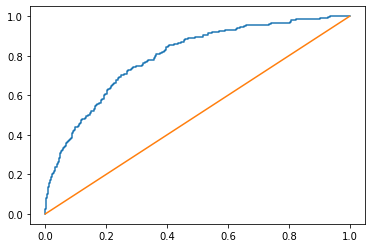

In [122]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

Compute the area under the ROC curve (AUC-ROC). 

In [124]:
roc_auc_score(y, probs[:, 1])

0.7947047741211369